# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline


In [2]:
# Load .env enviroment variables
load_dotenv()


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_price_cad = btc_response_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price_cad = eth_response_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price_cad
my_eth_value = my_eth * eth_price_cad

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45599.95
The current value of your 5.3 ETH is $12740.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFram
df_portfolio

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2023-03-23 04:00:00+00:00  99.68  100.05  99.51  99.99  9901809       35828   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-23 04:00:00+00:00  99.705123  395.09  399.29  390.35  393.17   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-03-23 04:00:00+00:00  117439012      856962  394.584017

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.99
Current SPY closing price: $393.17


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price





# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19998.00
The current value of your 50 SPY shares is $19658.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
data = {'amount':[total_crypto_value, total_shares_value]}
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)



,amount
crypto,58340.370874
shares,39656.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

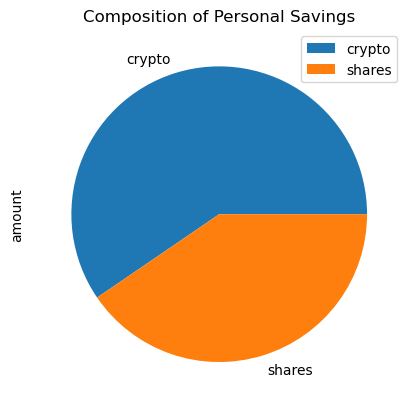

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You are only ${emergency_fund-total_savings} away from reaching your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2018-03-23', tz='America/New_York').isoformat()
end_date = today

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-03-23 04:00:00+00:00       11823  106.607241  264.17  265.02  257.8300   
2018-03-26 04:00:00+00:00       19722  106.583861  262.13  265.43  259.4100   
2018-03-27 04:00:00+00:00       14293  106.826049  266.17  266.77  258.8400   
2018-03-28 04:00:00+00:00       18689  106.978133  260.75  262.64  258.5800   
2018-03-29 04:00:00+00:00       20364  107.212902  261.12  265.26  259.8389   

                                                                       
                             close     volume trade_count        vwap  
timestamp                                                              
2018-03-23 04:00:00+00:00  258.015  183856351      624778  261.280967  
2018-03-26 04:00:00+00:00  265.140  143141239      450168  262.353110  
2018-03-27 04:00:00+00:00  260.760  130806695      538201  263.145788  
2018-03-28 04:00:00+00:00  259.850  146510333      590467  260.395684  
2018-03-29 04:00:00+00:00  263.430  125470572      436558  262.835186

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-23 04:00:00+00:00       11823  106.607241          NaN  264.17   
2018-03-26 04:00:00+00:00       19722  106.583861    -0.000375  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   
2018-03-28 04:00:00+00:00       18689  106.978133     0.000561  260.75   
2018-03-29 04:00:00+00:00       20364  107.212902     0.002899  261.12   

                                                                             \
                             high       low    close     volume trade_count   
timestamp                                                                     
2018-03-23 04:00:00+00:00  265.02  257.8300  258.015  183856351      624778   
2018-03-26 04:00:00+00:00  265.43  259.4100  265.140  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.8400  260.760  130806695      538201   
2018-03-28 04:00:00+00:00  262.64  258.5800  259.850  146510333      590467   
2018-03-29 04:00:00+00:00  265.26  259.8389  263.430  125470572      436558   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-23 04:00:00+00:00  261.280967          NaN  
2018-03-26 04:00:00+00:00  262.353110     0.027615  
2018-03-27 04:00:00+00:00  263.145788    -0.016520  
2018-03-28 04:00:00+00:00  260.395684    -0.003490  
2018-03-29 04:00:00+00:00  262.835186     0.013777

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996041,0.995682,1.002691,1.011502,0.996794,0.996888,1.006575,0.999341,0.998058,0.990978,...,0.994029,1.004240,0.998780,1.014289,1.011238,1.007299,0.997731,1.009075,0.998045,0.988514
2,0.990916,0.985730,1.006410,1.022823,0.979629,0.991329,1.015463,1.006544,1.006663,0.984923,...,0.994829,1.003209,1.003444,1.013997,1.023809,0.989745,1.002124,1.012367,1.011990,0.995956
3,0.986517,0.980130,1.018802,1.022555,0.974382,0.991200,1.032749,0.998917,1.011519,0.979600,...,0.982341,0.986508,1.017438,1.013097,1.024780,0.985756,0.997860,1.003845,1.025597,0.982702
4,0.988234,0.988207,1.017093,1.017552,0.976610,0.987622,1.038489,0.990728,1.008039,0.977740,...,0.982959,0.994333,1.016040,1.004807,1.019506,0.993965,0.991807,1.001544,1.017379,0.979915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.457507,4.645107,4.616076,4.290309,6.600693,7.682892,5.771577,21.548768,5.077047,15.711240,...,7.522206,4.905020,1.532352,4.161881,2.660153,5.672390,14.494992,9.540180,9.595500,5.146570
7557,8.453410,4.717557,4.688219,4.250678,6.664501,7.789694,5.854651,21.247228,5.019141,15.775088,...,7.604936,4.915712,1.535913,4.052583,2.665867,5.697912,14.710238,9.421077,9.609662,5.185481
7558,8.447581,4.789917,4.729923,4.279168,6.699919,7.822305,5.915431,21.421465,5.024192,15.826987,...,7.461212,4.864370,1.526588,4.023911,2.607586,5.592619,14.752808,9.344051,9.634044,5.166637
7559,8.380235,4.796716,4.714385,4.353469,6.765161,7.811918,5.957692,21.551877,5.055761,15.663496,...,7.523805,4.847482,1.538275,4.084197,2.637451,5.619979,14.651021,9.438171,9.538396,5.172227


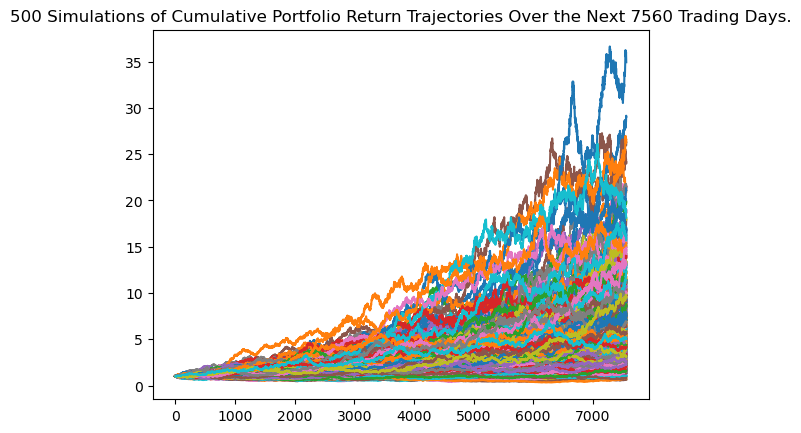

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

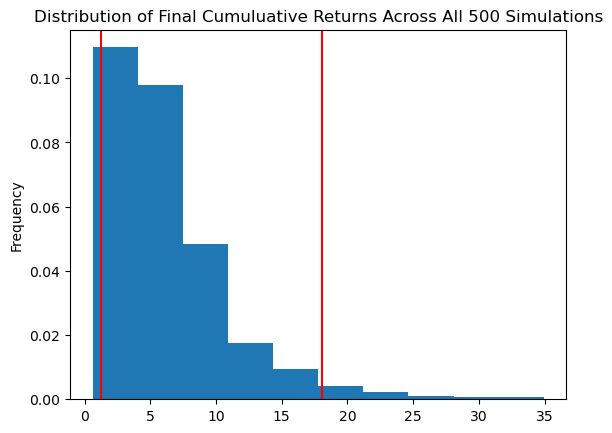

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.203413
std               4.618896
min               0.631951
25%               2.951750
50%               4.903399
75%               8.069531
max              34.925427
95% CI Lower      1.243800
95% CI Upper     18.048798
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24876.0 and $360975.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37314.01 and $541463.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986406,0.991283,1.012337,1.003349,0.987438,0.996395,0.994093,1.007358,0.991086,1.009185,...,1.002090,0.996726,0.999407,1.008102,1.003691,1.004355,1.006382,1.004507,1.000228,0.995668
2,1.003497,0.985610,1.007780,1.007749,0.982466,0.994188,0.983579,0.990854,0.988793,1.002547,...,1.009402,0.995903,0.994547,0.998826,1.003881,1.012572,1.007825,1.014590,1.005078,0.988528
3,0.994887,0.983324,1.016117,1.011558,0.979690,1.015057,0.974054,0.982724,0.996689,1.002000,...,0.996708,1.002621,0.989995,1.007980,1.008350,1.010439,1.001481,1.006259,0.996222,0.985725
4,0.980840,0.983230,1.016720,1.006640,0.992868,1.009050,0.978592,0.983172,0.996001,0.996144,...,1.008983,1.012713,0.989773,1.018332,1.005038,1.004331,0.993621,1.012692,0.992447,0.992272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.252200,1.451691,1.145717,1.381626,1.054169,0.941980,1.505904,0.763790,0.926163,0.876254,...,1.704986,1.057281,1.359527,1.053216,1.120826,1.232761,1.644302,1.478691,1.728197,1.649545
1257,1.249328,1.441723,1.142613,1.374555,1.040201,0.954735,1.503810,0.766560,0.926977,0.881835,...,1.745897,1.048764,1.356246,1.054884,1.111989,1.227951,1.668477,1.478387,1.713985,1.642403
1258,1.251376,1.443498,1.144807,1.367748,1.036984,0.967217,1.501657,0.775192,0.913611,0.872669,...,1.747905,1.046181,1.360168,1.045388,1.097868,1.232178,1.679743,1.500287,1.707676,1.655005
1259,1.233973,1.446456,1.148234,1.352985,1.044280,0.971246,1.505641,0.770029,0.904659,0.886257,...,1.743209,1.042364,1.370381,1.055319,1.097513,1.224896,1.702738,1.499537,1.701088,1.644462


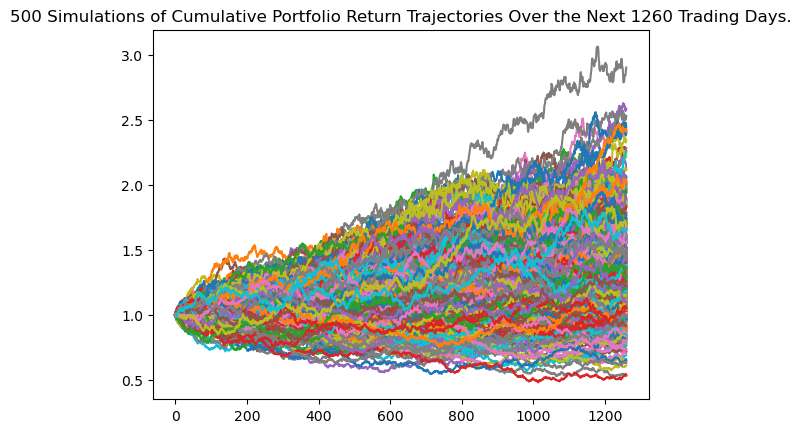

In [26]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

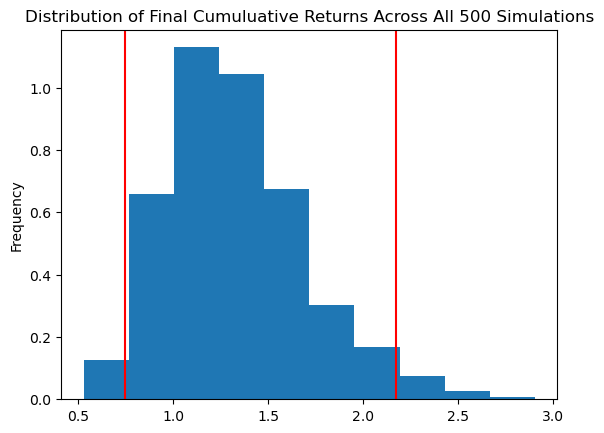

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.331249
std               0.365340
min               0.530660
25%               1.071763
50%               1.286840
75%               1.522902
max               2.904028
95% CI Lower      0.749091
95% CI Upper      2.173305
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44945.48 and $130398.32


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005947,1.012123,0.989331,0.995452,0.996952,1.006206,1.003425,0.998363,0.994326,1.005130,...,0.987919,1.005959,1.004801,1.003169,1.000426,1.010093,1.025755,0.996416,1.002163,1.004492
2,1.018110,1.014538,0.990676,0.989852,0.990808,1.005506,0.998105,1.001420,0.996570,0.991726,...,0.981400,1.005315,1.003558,1.006525,0.997478,1.013122,1.023173,0.995996,1.006238,1.008140
3,1.015692,1.036334,0.986939,0.991649,0.989820,1.025233,0.995620,0.998204,0.992561,0.998067,...,0.978690,1.013334,1.005368,1.016908,0.996652,1.015214,1.008700,1.002290,1.002500,1.018784
4,1.008667,1.033395,0.985344,0.978542,0.986490,1.009567,0.982233,1.001658,0.984286,0.986924,...,0.952811,1.015404,1.023996,1.008646,0.996232,1.012833,0.997376,0.990335,0.999441,1.035453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.920129,2.707689,1.655512,2.986786,1.687647,1.434417,1.962689,1.095920,1.199852,1.883333,...,1.678700,4.068657,1.188563,1.255142,3.766988,0.848044,2.283597,0.829252,1.597383,1.788467
2517,1.897832,2.715641,1.665576,3.009258,1.703799,1.458372,1.963300,1.107963,1.189984,1.902000,...,1.666492,4.046436,1.183885,1.250123,3.739282,0.863671,2.259787,0.817626,1.597153,1.783658
2518,1.881865,2.699286,1.681887,3.062612,1.703913,1.450560,1.963141,1.108901,1.179123,1.902516,...,1.679291,4.078074,1.177599,1.262730,3.721448,0.854766,2.216832,0.811552,1.598162,1.790075
2519,1.903105,2.698418,1.688211,3.055809,1.710779,1.444162,1.942077,1.101692,1.180745,1.893417,...,1.667115,4.063402,1.177239,1.255098,3.720164,0.849334,2.224802,0.817354,1.613976,1.809569


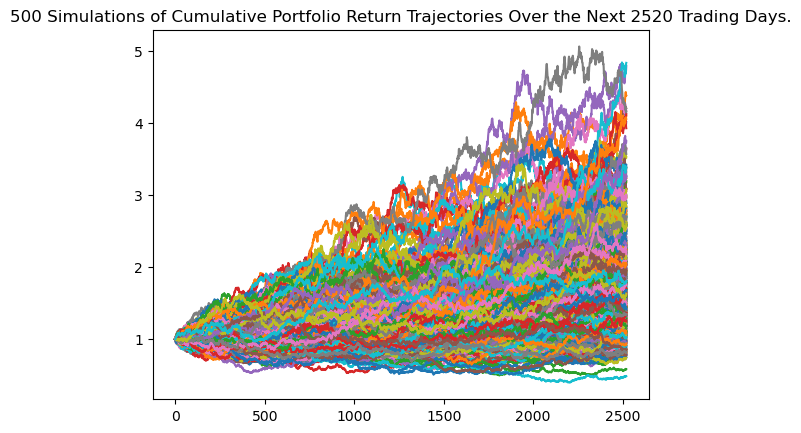

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

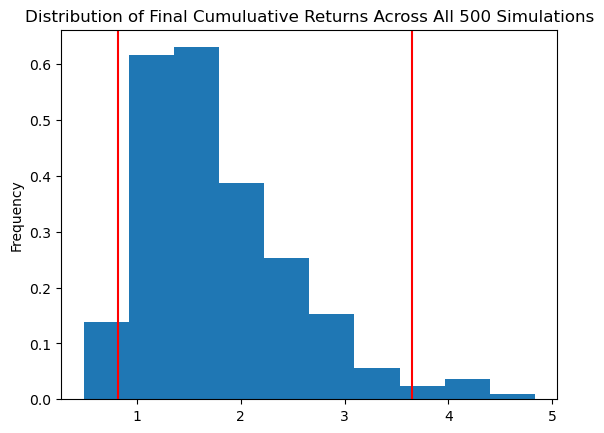

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.789904
std               0.726134
min               0.487398
25%               1.243448
50%               1.649724
75%               2.181301
max               4.833005
95% CI Lower      0.815330
95% CI Upper      3.645446
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48919.79 and $218726.75
